### Data Understanding

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

In [3]:
df = pd.read_csv('data/Pump_it_Up_Data_Mining_the_Water_Table_-_Training_set_values.csv')
df.head(5)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [5]:
df2 = pd.read_csv('data/Pump_it_Up_Data_Mining_the_Water_Table_-_Training_set_labels.csv')
df2.head(5)

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


### Test Train Split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(df, df2, test_size = 0.25, random_state = 47)

In [7]:
df_combined = X_train.merge(y_train, on='id', how='left')

In [8]:
df_combined.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'status_group'],
      dtype='object')

In [9]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44550 entries, 0 to 44549
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     44550 non-null  int64  
 1   amount_tsh             44550 non-null  float64
 2   date_recorded          44550 non-null  object 
 3   funder                 41830 non-null  object 
 4   gps_height             44550 non-null  int64  
 5   installer              41810 non-null  object 
 6   longitude              44550 non-null  float64
 7   latitude               44550 non-null  float64
 8   wpt_name               44550 non-null  object 
 9   num_private            44550 non-null  int64  
 10  basin                  44550 non-null  object 
 11  subvillage             44264 non-null  object 
 12  region                 44550 non-null  object 
 13  region_code            44550 non-null  int64  
 14  district_code          44550 non-null  int64  
 15  lg

In [30]:
df_combined.describe()

,id,amount_tsh,gps_height,longitude,latitude,region_code,district_code,population,construction_year
count,44550.000000,44550.000000,44550.000000,44550.000000,4.455000e+04,44550.000000,44550.000000,44550.000000,44550.000000
mean,37115.189877,305.519525,667.041369,34.082202,-5.697307e+00,15.186263,5.572682,179.922424,1299.385320
std,21441.751987,2704.463550,692.153794,6.561386,2.941300e+00,17.436501,9.512627,454.557726,952.070347
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,1.000000,0.000000,0.000000,0.000000
25%,18522.250000,0.000000,0.000000,33.098104,-8.518910e+00,5.000000,2.000000,0.000000,0.000000
50%,37059.500000,0.000000,368.000000,34.915799,-5.007479e+00,12.000000,3.000000,25.000000,1986.000000
75%,55625.750000,20.000000,1319.000000,37.173091,-3.326482e+00,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2628.000000,40.345193,-2.000000e-08,99.000000,80.000000,15300.000000,2013.000000


### Missing Values

In [11]:
df_combined.isna().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    2720
gps_height                   0
installer                 2740
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 286
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            2508
recorded_by                  0
scheme_management         2938
scheme_name              21121
permit                    2263
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [86]:
df_combined.head(3)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,29040,0.0,2013-02-05,Tcrs,1295,Community,30.617206,-3.574069,Ndagije,0,...,soft,good,enough,enough,spring,spring,groundwater,improved spring,improved spring,functional
1,69788,50.0,2011-03-12,Private Individual,181,WU,38.354049,-6.642347,Digali,0,...,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional
2,51208,300.0,2011-02-26,Ki,490,Ki,37.048901,-6.758648,Shuleni,0,...,soft,good,insufficient,insufficient,machine dbh,borehole,groundwater,communal standpipe,communal standpipe,non functional


In [87]:
df_combined['status_group'].value_counts()

functional                 24237
non functional             17102
functional needs repair     3211
Name: status_group, dtype: int64

In [88]:
X_train['scheme_name'].value_counts()

K                       499
None                    479
Borehole                400
M                       305
Chalinze wate           298
                       ... 
Magundi water supply      1
Mlem                      1
Serian maji salama        1
Kasota                    1
BL Mese Tank              1
Name: scheme_name, Length: 2515, dtype: int64

In [89]:
X_train['scheme_management'].value_counts()

VWC                 27629
WUG                  3894
Water authority      2347
WUA                  2156
Water Board          2080
Parastatal           1236
Private operator      798
Company               792
Other                 559
SWC                    64
Trust                  56
None                    1
Name: scheme_management, dtype: int64

In [90]:
X_train[['num_private']].tail(3)

,num_private
47431,0
51078,0
38023,0


In [91]:
X_train[['payment', 'payment_type']]

,payment,payment_type
8956,unknown,unknown
16599,pay per bucket,per bucket
53788,pay when scheme fails,on failure
28511,pay monthly,monthly
22203,pay monthly,monthly
...,...,...
23112,pay monthly,monthly
11528,unknown,unknown
47431,never pay,never pay
51078,pay annually,annually


In [92]:
X_train[['basin']]

,basin
8956,Lake Tanganyika
16599,Wami / Ruvu
53788,Wami / Ruvu
28511,Lake Nyasa
22203,Pangani
...,...
23112,Pangani
11528,Internal
47431,Wami / Ruvu
51078,Rufiji


__Missing Values Decisions__
- drop scheme_name column
- drop NAN rows from scheme_management, funder, installer, subvillage, permit 

__Non-Relevant Data__
- num_private has no description and is all zeros, removing column. 
- drop payment_type, quantity group, waterpoint_type_group because these are redundant with payment, quantity.

__Categorical Features__
- All except latitude, longitude, gps height, population, construction_year

In [12]:
df_combined = df_combined.drop(columns=['scheme_name', 'payment_type', 'quantity_group', 'waterpoint_type_group', 'num_private'])

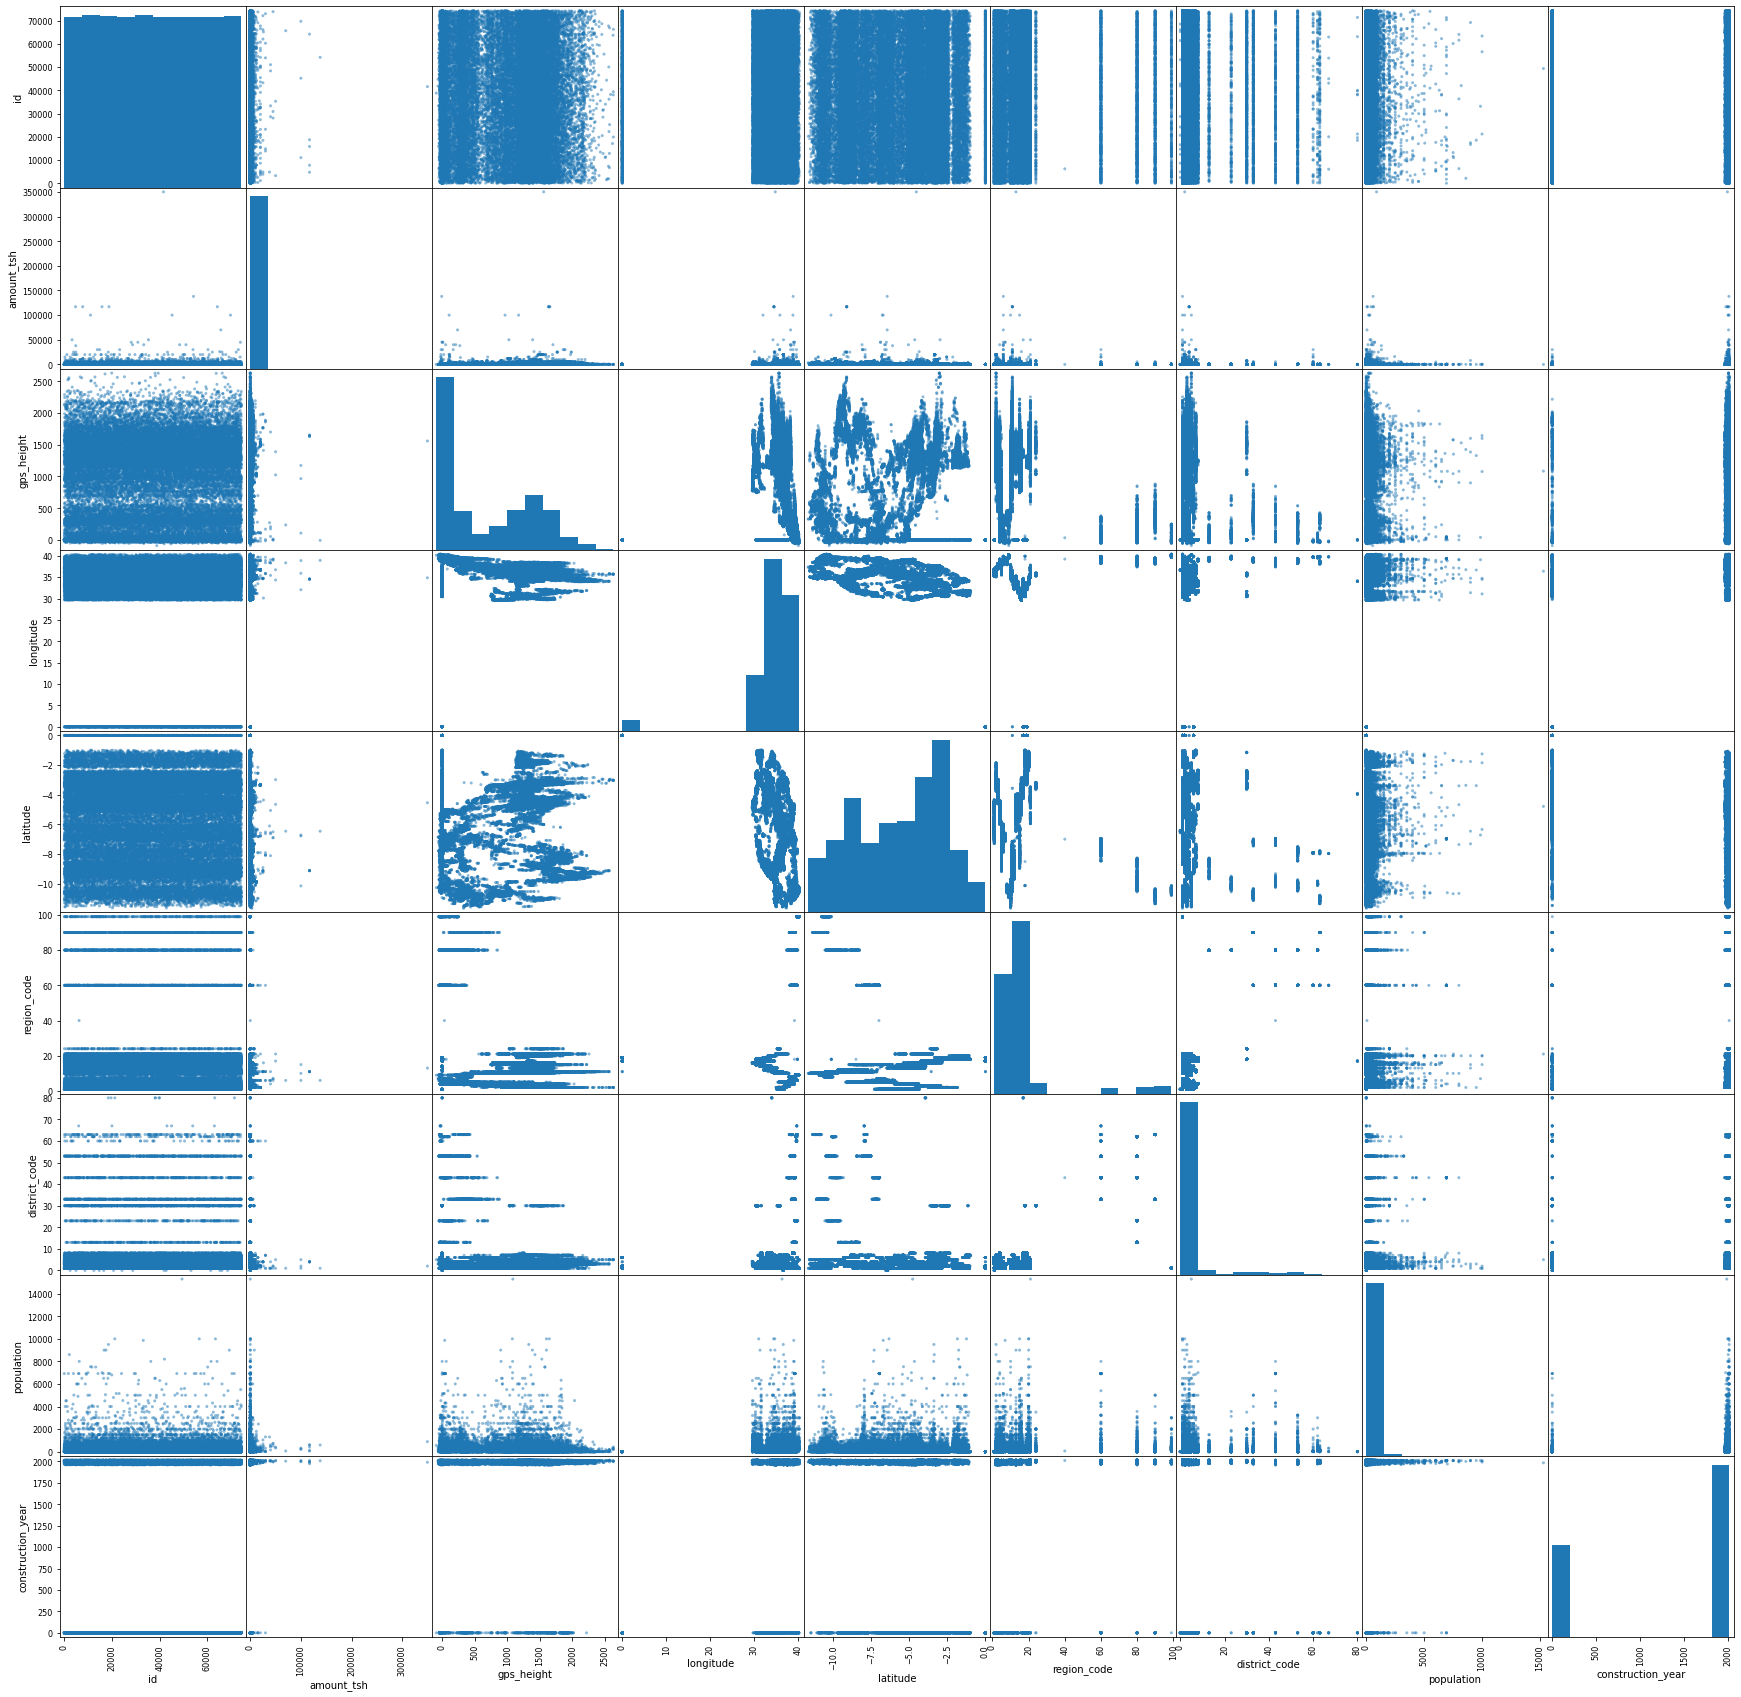

In [28]:
pd.plotting.scatter_matrix(df_combined, alpha=0.5, figsize=(30,30));

In [16]:
df_combined.isna().sum()

id                          0
amount_tsh                  0
date_recorded               0
funder                   2720
gps_height                  0
installer                2740
longitude                   0
latitude                    0
wpt_name                    0
basin                       0
subvillage                286
region                      0
region_code                 0
district_code               0
lga                         0
ward                        0
population                  0
public_meeting           2508
recorded_by                 0
scheme_management        2938
permit                   2263
construction_year           0
extraction_type             0
extraction_type_group       0
extraction_type_class       0
management                  0
management_group            0
payment                     0
water_quality               0
quality_group               0
quantity                    0
source                      0
source_type                 0
source_cla

In [72]:
#df_combined = df_combined.dropna(axis=0, how='any')

In [21]:
cols = list(df_combined.columns)

In [18]:
SI = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df_imputed = SI.fit_transform(df_combined)
df_imputed

array([[29040, 0.0, '2013-02-05', ..., 'groundwater', 'improved spring',
        'functional'],
       [69788, 50.0, '2011-03-12', ..., 'surface', 'communal standpipe',
        'functional'],
       [51208, 300.0, '2011-02-26', ..., 'groundwater',
        'communal standpipe', 'non functional'],
       ...,
       [53875, 0.0, '2013-03-15', ..., 'groundwater',
        'communal standpipe', 'non functional'],
       [8608, 20000.0, '2011-02-28', ..., 'groundwater',
        'communal standpipe', 'functional'],
       [60477, 0.0, '2011-03-14', ..., 'groundwater',
        'communal standpipe', 'functional']], dtype=object)

In [23]:
df_imputed = pd.DataFrame(data=df_imputed, columns=cols)
df_imputed.head(3)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,basin,...,management_group,payment,water_quality,quality_group,quantity,source,source_type,source_class,waterpoint_type,status_group
0,29040,0,2013-02-05,Tcrs,1295,Community,30.6172,-3.57407,Ndagije,Lake Tanganyika,...,user-group,unknown,soft,good,enough,spring,spring,groundwater,improved spring,functional
1,69788,50,2011-03-12,Private Individual,181,WU,38.354,-6.64235,Digali,Wami / Ruvu,...,commercial,pay per bucket,soft,good,enough,river,river/lake,surface,communal standpipe,functional
2,51208,300,2011-02-26,Ki,490,Ki,37.0489,-6.75865,Shuleni,Wami / Ruvu,...,user-group,pay when scheme fails,soft,good,insufficient,machine dbh,borehole,groundwater,communal standpipe,non functional


In [24]:
df_imputed.isna().sum()

id                       0
amount_tsh               0
date_recorded            0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
wpt_name                 0
basin                    0
subvillage               0
region                   0
region_code              0
district_code            0
lga                      0
ward                     0
population               0
public_meeting           0
recorded_by              0
scheme_management        0
permit                   0
construction_year        0
extraction_type          0
extraction_type_group    0
extraction_type_class    0
management               0
management_group         0
payment                  0
water_quality            0
quality_group            0
quantity                 0
source                   0
source_type              0
source_class             0
waterpoint_type          0
status_group             0
dtype: int64

### Checking Numerical Data

In [33]:
numeric_features = df_imputed[['amount_tsh', 'gps_height', 'latitude', 'longitude', 'population', 'construction_year']]
numeric_features.head(3)

,amount_tsh,gps_height,latitude,longitude,population,construction_year
0,0,1295,-3.57407,30.6172,120,2001
1,50,181,-6.64235,38.354,50,2011
2,300,490,-6.75865,37.0489,500,2011


In [41]:
sns.set(style='whitegrid')
sns.violinplot(x=numeric_features['amount_tsh'])

TypeError: No loop matching the specified signature and casting was found for ufunc add

TypeError: No loop matching the specified signature and casting was found for ufunc add

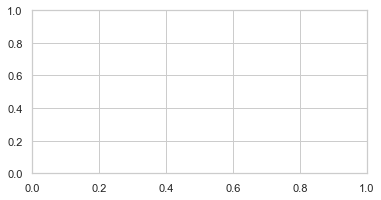

In [39]:
sns.set(style='whitegrid')

for col in numeric_features:
    fig, ax = plt.subplots(figsize=(6,3))
    sns.violinplot(x=numeric_features[col])